# Введение в библиотеки моделирования на Python

In [1]:
import pandas as pd

Переходником между pandas и  другими аналитическими библиотеками 
обычно являются массивы NumPy. Для преобразования объекта DataFrame 
в массив NumPy используется метод to_numpy

In [2]:
data_football = pd.read_csv('data_football')
data_football

,name,speed,shoot,dribbling,pas,phy,def,rating,position
0,messi,7,10,10,10,7,6,91,attack
1,ronaldo,8,9,7,6,9,5,81,attack
2,neymar,9,7,9,8,6,5,81,attack
3,ibra,6,7,7,7,8,6,76,middle
4,mbappe,10,8,8,7,7,4,81,attack
5,ramos,6,7,5,7,7,9,76,defender
6,alba,7,6,6,8,6,7,75,defender
7,modric,7,8,7,9,7,7,83,middle
8,xavi,7,7,8,9,6,8,83,defender
9,de_bruyne,7,8,7,10,7,7,85,middle


In [3]:
data_titanic = pd.read_csv('train.csv')
data_titanic1 = data_titanic.iloc[:,[1,2,4,5,6,7,-1,-2]]
data_titanic1

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Cabin
0,0,3,male,22.0,1,0,S,NaN
1,1,1,female,38.0,1,0,C,C85
2,1,3,female,26.0,0,0,S,NaN
3,1,1,female,35.0,1,0,S,C123
4,0,3,male,35.0,0,0,S,NaN
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,NaN
887,1,1,female,19.0,0,0,S,B42
888,0,3,female,NaN,1,2,S,NaN
889,1,1,male,26.0,0,0,C,C148


In [4]:
data_football.to_numpy()  # преобразование данных в массив numpy

array([['messi', 7, 10, 10, 10, 7, 6, 91, 'attack'],
       ['ronaldo', 8, 9, 7, 6, 9, 5, 81, 'attack'],
       ['neymar', 9, 7, 9, 8, 6, 5, 81, 'attack'],
       ['ibra', 6, 7, 7, 7, 8, 6, 76, 'middle'],
       ['mbappe', 10, 8, 8, 7, 7, 4, 81, 'attack'],
       ['ramos', 6, 7, 5, 7, 7, 9, 76, 'defender'],
       ['alba', 7, 6, 6, 8, 6, 7, 75, 'defender'],
       ['modric', 7, 8, 7, 9, 7, 7, 83, 'middle'],
       ['xavi', 7, 7, 8, 9, 6, 8, 83, 'defender'],
       ['de_bruyne', 7, 8, 7, 10, 7, 7, 85, 'middle'],
       ['haaland', 9, 8, 6, 6, 10, 5, 81, 'attack']], dtype=object)

Метод to_numpy предназначен для использования в  случае, когда данные 
однородны, например все имеют числовой тип. При наличии неоднородных 
данных получится массив ndarray объектов Python

In [5]:
data_football.loc[:,['speed','shoot','pas']].to_numpy()   # отобрать числовые данные для моделирования

array([[ 7, 10, 10],
       [ 8,  9,  6],
       [ 9,  7,  8],
       [ 6,  7,  7],
       [10,  8,  7],
       [ 6,  7,  7],
       [ 7,  6,  8],
       [ 7,  8,  9],
       [ 7,  7,  9],
       [ 7,  8, 10],
       [ 9,  8,  6]], dtype=int64)

## Описание моделей с помощью Patsy

In [6]:
import patsy
import numpy as np

In [7]:
data_titanic2 = data_titanic1.iloc[:,[1,3,0]]
data_titanic2

,Pclass,Age,Survived
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0
...,...,...,...
886,2,27.0,0
887,1,19.0,1
888,3,NaN,0
889,1,26.0,1


In [8]:
y, X = patsy.dmatrices('Survived ~ Pclass + Age + 0', data_titanic2)

In [9]:
X[0]

array([ 3., 22.])

In [10]:
y[0]

array([0.])

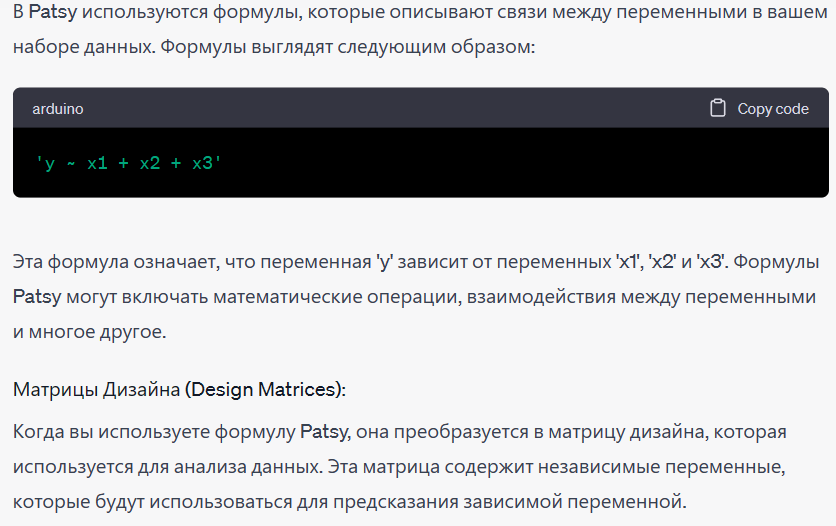

## Преобразование данных в формулах Patsy

In [11]:
np.linalg.lstsq(X, y)   #  использовать напрямую с функциями numpy


C:\Users\dermi\AppData\Local\Temp\ipykernel_4992\3423071724.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(X, y)   #  использовать напрямую с функциями numpy


(array([[0.0492256 ],
        [0.00774478]]),
 array([199.61092296]),
 2,
 array([884.72771294,  39.51390206]))

np.linalg.lstsq(X, y) - это функция, которая помогает находить лучшее приближенное решение для системы линейных уравнений, когда у вас больше уравнений, чем неизвестных. В простых словах, она позволяет найти наилучшие коэффициенты для уравнения, которое наилучшим образом подходит к ваши данным.

Из часто используемых преобразований отметим стандартизацию (приведение к распределению со средним 0 и дисперсией 1) и центрирование (вычитание среднего)

In [12]:
y, X = patsy.dmatrices('rating ~ standardize(speed) + center(shoot)', data_football)

In [13]:
X

DesignMatrix with shape (11, 3)
  Intercept  standardize(speed)  center(shoot)
          1            -0.44233        2.27273
          1             0.36860        1.27273
          1             1.17954       -0.72727
          1            -1.25326       -0.72727
          1             1.99047        0.27273
          1            -1.25326       -0.72727
          1            -0.44233       -1.72727
          1            -0.44233        0.27273
          1            -0.44233       -0.72727
          1            -0.44233        0.27273
          1             1.17954        0.27273
  Terms:
    'Intercept' (column 0)
    'standardize(speed)' (column 1)
    'center(shoot)' (column 2)

В процессе моделирования мы иногда обучаем модель на одном наборе 
данных, а затем тестируем на другом. В роли другого набора может выступать 
зарезервированная часть данных или новые данные, полученные позже. Применяя преобразования типа центрирования и стандартизации, следует быть 
осторожным, когда модель используется для предсказания на новых данных. 
Говорят, что такие преобразования обладают состоянием, потому что при 
преобразовании нового набора данных мы должны использовать статистики, 
в частности среднее и стандартное отклонение, исходного набора. 
Функция patsy.build_design_matrices умеет применять преобразования к новым 
вневыборочным данным, используя информацию, сохраненную для исходного 
внутривыборочного набора данных

In [14]:
data_football

,name,speed,shoot,dribbling,pas,phy,def,rating,position
0,messi,7,10,10,10,7,6,91,attack
1,ronaldo,8,9,7,6,9,5,81,attack
2,neymar,9,7,9,8,6,5,81,attack
3,ibra,6,7,7,7,8,6,76,middle
4,mbappe,10,8,8,7,7,4,81,attack
5,ramos,6,7,5,7,7,9,76,defender
6,alba,7,6,6,8,6,7,75,defender
7,modric,7,8,7,9,7,7,83,middle
8,xavi,7,7,8,9,6,8,83,defender
9,de_bruyne,7,8,7,10,7,7,85,middle


## Категориальные данные и Patsy

In [15]:
data_1 = data_football.drop('name',axis=1)
data_1

,speed,shoot,dribbling,pas,phy,def,rating,position
0,7,10,10,10,7,6,91,attack
1,8,9,7,6,9,5,81,attack
2,9,7,9,8,6,5,81,attack
3,6,7,7,7,8,6,76,middle
4,10,8,8,7,7,4,81,attack
5,6,7,5,7,7,9,76,defender
6,7,6,6,8,6,7,75,defender
7,7,8,7,9,7,7,83,middle
8,7,7,8,9,6,8,83,defender
9,7,8,7,10,7,7,85,middle


In [16]:
y, X = patsy.dmatrices('rating ~ speed + position', data_1)

In [17]:
X

DesignMatrix with shape (11, 4)
  Intercept  position[T.defender]  position[T.middle]  speed
          1                     0                   0      7
          1                     0                   0      8
          1                     0                   0      9
          1                     0                   1      6
          1                     0                   0     10
          1                     1                   0      6
          1                     1                   0      7
          1                     0                   1      7
          1                     1                   0      7
          1                     0                   1      7
          1                     0                   0      9
  Terms:
    'Intercept' (column 0)
    'position' (columns 1:3)
    'speed' (column 3)

In [18]:
patsy.dmatrices('rating ~ speed + C(position)', data_1)

(DesignMatrix with shape (11, 1)
   rating
       91
       81
       81
       76
       81
       76
       75
       83
       83
       85
       81
   Terms:
     'rating' (column 0),
 DesignMatrix with shape (11, 4)
   Intercept  C(position)[T.defender]  C(position)[T.middle]  speed
           1                        0                      0      7
           1                        0                      0      8
           1                        0                      0      9
           1                        0                      1      6
           1                        0                      0     10
           1                        1                      0      6
           1                        1                      0      7
           1                        0                      1      7
           1                        1                      0      7
           1                        0                      1      7
           1                  

In [19]:
data_titanic1

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Cabin
0,0,3,male,22.0,1,0,S,NaN
1,1,1,female,38.0,1,0,C,C85
2,1,3,female,26.0,0,0,S,NaN
3,1,1,female,35.0,1,0,S,C123
4,0,3,male,35.0,0,0,S,NaN
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,NaN
887,1,1,female,19.0,0,0,S,B42
888,0,3,female,NaN,1,2,S,NaN
889,1,1,male,26.0,0,0,C,C148


In [20]:
data_2 = data_titanic1.dropna()
data_2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Cabin
1,1,1,female,38.0,1,0,C,C85
3,1,1,female,35.0,1,0,S,C123
6,0,1,male,54.0,0,0,S,E46
10,1,3,female,4.0,1,1,S,G6
11,1,1,female,58.0,0,0,S,C103
...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,S,D35
872,0,1,male,33.0,0,0,S,B51 B53 B55
879,1,1,female,56.0,0,1,C,C50
887,1,1,female,19.0,0,0,S,B42


In [21]:
y, X  = patsy.dmatrices('Survived ~ Age + Sex + Embarked + Sex:Embarked + 0', data_2[40:]) 
# если больше 2 категорий, то может быть важно взаимодействие

In [22]:
X

DesignMatrix with shape (143, 7)
  Columns:
    ['Sex[female]',
     'Sex[male]',
     'Embarked[T.Q]',
     'Embarked[T.S]',
     'Sex[T.male]:Embarked[T.Q]',
     'Sex[T.male]:Embarked[T.S]',
     'Age']
  Terms:
    'Sex' (columns 0:2)
    'Embarked' (columns 2:4)
    'Sex:Embarked' (columns 4:6)
    'Age' (column 6)
  (to view full data, use np.asarray(this_obj))

In [23]:
data_football['long_name'] = data_football['name'].apply(len)

data_football['long_name'] = np.where(data_football['long_name'] <= 6, 'short', 'long')

data_football

,name,speed,shoot,dribbling,pas,phy,def,rating,position,long_name
0,messi,7,10,10,10,7,6,91,attack,short
1,ronaldo,8,9,7,6,9,5,81,attack,long
2,neymar,9,7,9,8,6,5,81,attack,short
3,ibra,6,7,7,7,8,6,76,middle,short
4,mbappe,10,8,8,7,7,4,81,attack,short
5,ramos,6,7,5,7,7,9,76,defender,short
6,alba,7,6,6,8,6,7,75,defender,short
7,modric,7,8,7,9,7,7,83,middle,short
8,xavi,7,7,8,9,6,8,83,defender,short
9,de_bruyne,7,8,7,10,7,7,85,middle,long


In [24]:
y, X = patsy.dmatrices('rating ~ position + long_name + position:long_name + 0', data_football.head(10))

In [25]:
data_2['Embarked'].value_counts()

S    116
C     65
Q      2
Name: Embarked, dtype: int64

In [26]:
X

DesignMatrix with shape (10, 6)
  Columns:
    ['position[attack]',
     'position[defender]',
     'position[middle]',
     'long_name[T.short]',
     'position[T.defender]:long_name[T.short]',
     'position[T.middle]:long_name[T.short]']
  Terms:
    'position' (columns 0:3)
    'long_name' (column 3)
    'position:long_name' (columns 4:6)
  (to view full data, use np.asarray(this_obj))

data_football['long_name'] = np.where(data_football['long_name'] <= 6, 'short', 'long')

data_football

#  Введение в statsmodels

Statsmodels (https://www.statsmodels.org/) – написанная на Python библиотека для 
обучения разнообразных статистических моделей, выполнения статистических 
тестов, разведки и визуализации данных. В statsmodels представлены в основном 
«классические» статистические методы на основе частотного подхода, а байесовские методы и модели машинного обучения лучше искать в других библиотеках.
Перечислим несколько видов моделей, имеющихся в statsmodels:
- линейные модели, обобщенные линейные модели и робастные линейные модели;
- линейные модели со смешанными эффектами;
- методы дисперсионного анализа (ANOVA);
- временные ряды и модели в пространстве состояний;
- обобщенные методы моментов.

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Оценивание линейных моделей

In [28]:
data_titanic2.dropna(subset=['Age', 'Pclass', 'Survived'], inplace=True)

C:\Users\dermi\AppData\Local\Temp\ipykernel_4992\1232107740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_titanic2.dropna(subset=['Age', 'Pclass', 'Survived'], inplace=True)


In [29]:
model = sm.OLS(data_titanic2['Survived'], data_titanic2[['Age','Pclass']])

In [30]:
results = model.fit()

In [31]:
results.params

Age       0.007745
Pclass    0.049226
dtype: float64

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.312
Model:                            OLS   Adj. R-squared (uncentered):              0.310
Method:                 Least Squares   F-statistic:                              161.2
Date:                Sun, 03 Mar 2024   Prob (F-statistic):                    1.79e-58
Time:                        21:12:05   Log-Likelihood:                         -558.12
No. Observations:                 714   AIC:                                      1120.
Df Residuals:                     712   BIC:                                      1129.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0077      0.001      8.012      0.000       0.006       0.010
Pclass         0.0492      0.013      3.679      0.000       0.023       0.075
==============================================================================
Omnibus:                     3603.757   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.558
Skew:                           0.365   Prob(JB):                     5.37e-23
Kurtosis:                       1.293   Cond. No.                         22.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='Frequency'>

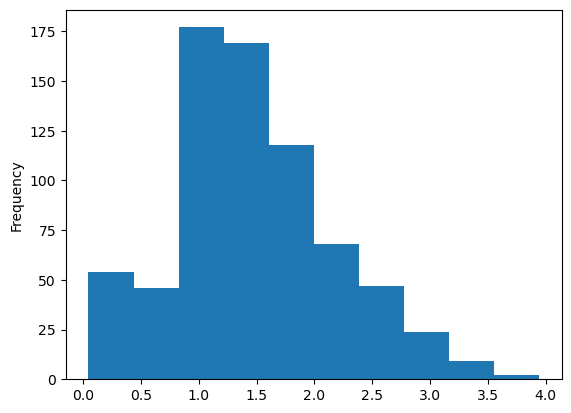

In [33]:
pr = results.predict(data_titanic2.iloc[:,[0,1]])
pr.sort_values().plot(kind='hist')

##  Введение в scikit-learn

Библиотека scikit-learn (https://scikit-learn.org/)  – один из самых популярных 
и  пользующихся доверием универсальных инструментов машинного обучения на Python. Она содержит широкий спектр стандартных методов машинного обучения с учителем и без учителя, предназначенных для выбора и оценки 
модели, загрузки и преобразования данных и сохранения моделей. Эти модели 
можно использовать для классификации, кластеризации, предсказания и решения других типичных задач

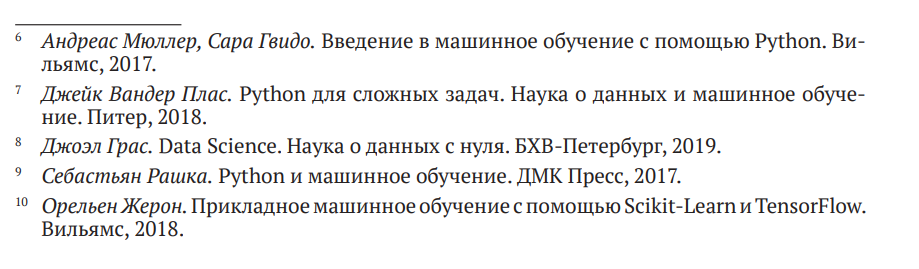